## Observations and Insights 

#Obeservation number 1: Infunobil treatment had one outlier
#Observation number 2: The Ramicane treatment had smallest average tumor volume
#Observation number 3: The sex of mice was not a contributing factor to the results since they were almost even.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_data=combined_mouse_data.loc[combined_mouse_data["Mouse ID"] != "g989"]
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
# Checking the number of mice in the clean DataFrame.
combined_mouse_data.nunique()["Mouse ID"]

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen=combined_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_regimen=combined_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_regimen=combined_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_regimen=combined_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_regimen=combined_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table_df=pd.DataFrame({
        "Mean value of Tumor Volume":mean_regimen,
        "Median value of Tumor Volume":median_regimen,
        "Variance value of Tumor Volume":var_regimen,
        "Standard Deviation of Tumor Volume":std_regimen,
        "SEM of Tumor Volume":sem_regimen,
})
summary_table_df

,Mean value of Tumor Volume,Median value of Tumor Volume,Variance value of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics=combined_mouse_data.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

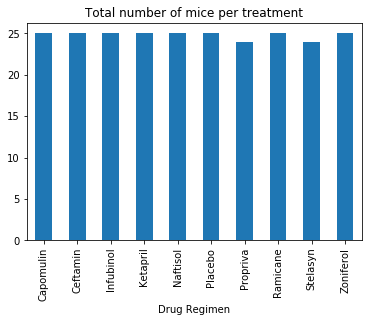

In [79]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
number_of_mice=combined_mouse_data.groupby("Drug Regimen").nunique()["Mouse ID"]
number_of_mice.plot.bar(x='Drug Regimen', y='Number of Mice')
plt.title("Total number of mice per treatment")
plt.show()

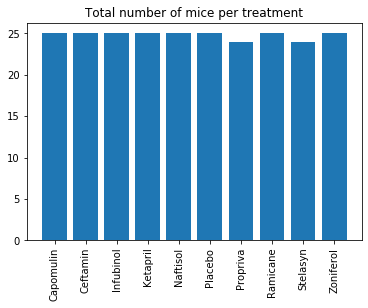

In [80]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = number_of_mice.index
y= number_of_mice
plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.title("Total number of mice per treatment")
plt.show()

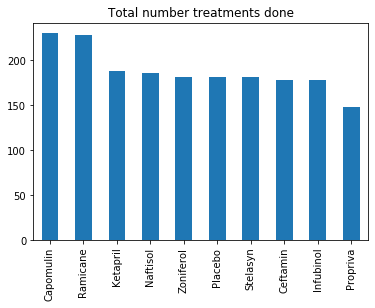

In [81]:
#do the value counts for each treatment (i.e. all the mice)
number_of_mice=combined_mouse_data["Drug Regimen"].value_counts()
number_of_mice.plot.bar(x='Drug Regimen', y='Number of Mice')
plt.title("Total number treatments done")
plt.show()

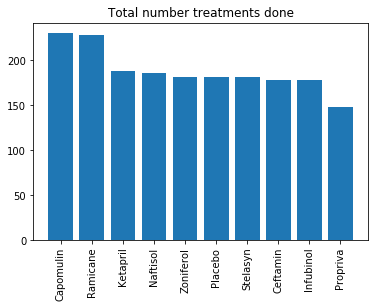

In [82]:
# Generate a bar plot showing the total value counts for each treatment using pyplot.
x = number_of_mice.index
y= number_of_mice
plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.title("Total number treatments done")
plt.show()

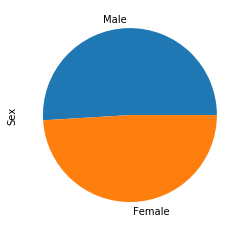

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=combined_mouse_data["Sex"].value_counts()
sex.plot.pie()

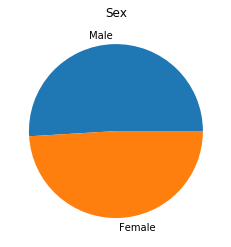

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(sex,labels=labels)
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_info=combined_mouse_data.loc[(combined_mouse_data['Drug Regimen']=='Capomulin')|(combined_mouse_data['Drug Regimen']=='Ramicane')|(combined_mouse_data['Drug Regimen']=="Infubinol")|(combined_mouse_data['Drug Regimen']=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_time_point_info=regimens_info.drop_duplicates(subset=['Mouse ID'], keep='last')

greatest_time_point_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x=greatest_time_point_info.loc[greatest_time_point_info["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_volume.append(x)
    
    # Determine outliers using upper and lower bounds
    quartiles = x.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #filter by drug regimen
#     print(f"The lower quartile  is: {lowerq}")
#     print(f"The upper quartile is: {upperq}")
#     print(f"The interquartile range of tumor volumes is: {iqr}")
#     print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.") must find the outliers
    outlier_mice =x.loc[(x < lower_bound) | (x > upper_bound)]
    print(outlier_mice)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


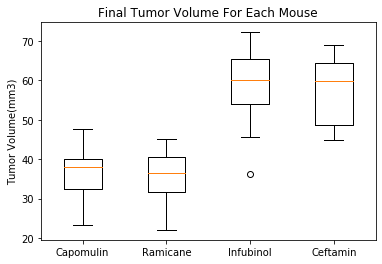

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
mice_ids=greatest_time_point_info["Mouse ID"]
final_tumor=greatest_time_point_info["Tumor Volume (mm3)"]
ax1.set_title('Final Tumor Volume For Each Mouse')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_volume,labels=drugs)
plt.show()


## Line and Scatter Plots

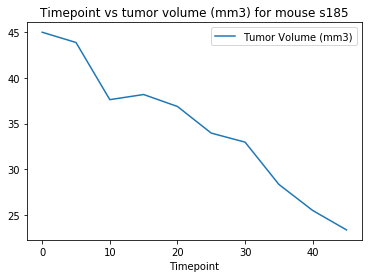

In [88]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_info=combined_mouse_data.loc[combined_mouse_data['Mouse ID']=='s185']
capomulin_info.plot.line(x='Timepoint',y="Tumor Volume (mm3)")
plt.title("Timepoint vs tumor volume (mm3) for mouse s185")
plt.show()

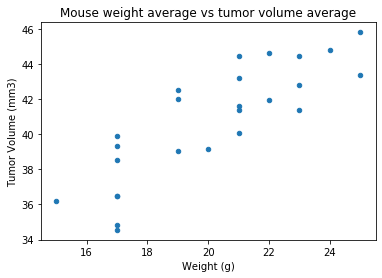

In [89]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_info=combined_mouse_data.loc[combined_mouse_data['Drug Regimen']=='Capomulin']
find_mice=capomulin_info.groupby("Mouse ID").mean()
find_mice.plot.scatter(x='Weight (g)',y="Tumor Volume (mm3)")
plt.title("Mouse weight average vs tumor volume average")
plt.show()

## Correlation and Regression

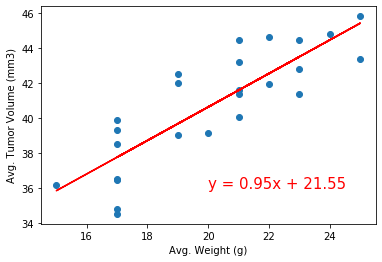

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_mouse_weight=find_mice['Weight (g)']
avg_tumor_vol=find_mice["Tumor Volume (mm3)"]
correlation_coefficient=round(st.pearsonr(avg_mouse_weight,avg_tumor_vol)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_mouse_weight, avg_tumor_vol)
regress_values = avg_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.plot(avg_mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()